In [130]:
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import mglearn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

%matplotlib inline

In [3]:
# The file has no headers naming the columns, so we pass header=None
# and provide the column names explicitly in 'names'
data = pd.read_csv('./adult.csv', header=None, index_col=False,
                  names=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                        'marital-status', 'occupation', 'relationship', 'race', 'gender',
                        'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
                        'income'])

# For illustration purposes, we only select some of the columns
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
            'occupation', 'income']]

# Ipython.display allows nice output formatting within the Jupyter notebook
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [4]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [7]:
print('Original features:\n{}\n'.format(data.columns))
data_dummies = pd.get_dummies(data)
print('Features after get_dummies:\n{}', data_dummies.columns)

Original features:
Index(['age', 'workclass', 'education', 'gender', 'hours-per-week',
       'occupation', 'income'],
      dtype='object')

Features after get_dummies:
{} Index(['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th',
       'education_ 11th', 'education_ 12th', 'education_ 1st-4th',
       'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th',
       'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors',
       'education_ Doctorate', 'education_ HS-grad', 'education_ Masters',
       'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'gender_ Female', 'gender_ Male',
       'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces',
       'occupation_ Craft-repair', '

In [8]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [9]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
# Extract Numpy arrays
X = features.values
y = data_dummies['income_ >50K'].values
print('X.shape: {} y.shape: {}'.format(X.shape, y.shape))

X.shape: (32561, 44) y.shape: (32561,)


In [10]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Test score: {:.2f}'.format(logreg.score(X_test, y_test)))

Test score: 0.81


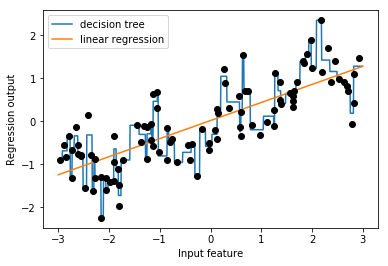

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label='decision tree')

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label='linear regression')

plt.plot(X[:, 0], y, 'o', c='k')
plt.xlabel('Input feature')
plt.ylabel('Regression output')
plt.legend()

Tree accuracy : 0.58
Linear accuracy : 0.50


Text(0,0.5,'Regression output')

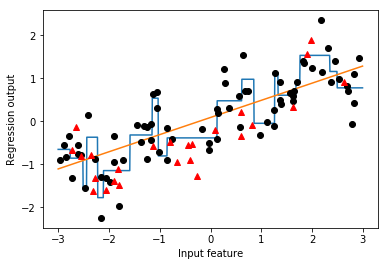

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

reg = DecisionTreeRegressor(min_samples_split=8).fit(X_train, y_train)
plt.plot(line, reg.predict(line), label='decision tree')
print('Tree accuracy : {:.2f}'.format(reg.score(X_test, y_test)))

reg = LinearRegression().fit(X_train, y_train)
plt.plot(line, reg.predict(line), label='linear regression')
print('Linear accuracy : {:.2f}'.format(reg.score(X_test, y_test)))

plt.plot(X_train[:, 0], y_train, 'o', c='k')
plt.plot(X_test[:, 0], y_test, '^', c='r')
plt.xlabel('Input feature')
plt.ylabel('Regression output')

In [68]:
bins = np.linspace(-3, 3, 11)
print('bins: {}'.format(bins))

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [69]:
which_bin = np.digitize(X, bins)
print('\nData points:\n', X[:5])
print('\nBin membership for data points:\n', which_bin[:5])


Data points:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [70]:
from sklearn.preprocessing import OneHotEncoder

# transform using the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# encoder.fit finds the unique values that appear in which_bin
encoder.fit(which_bin)

# transform creates the one-hot encoding
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [71]:
print('X_binned.shape: {}'.format(X_binned.shape))

X_binned.shape: (100, 10)


Text(0,0.5,'Regression output')

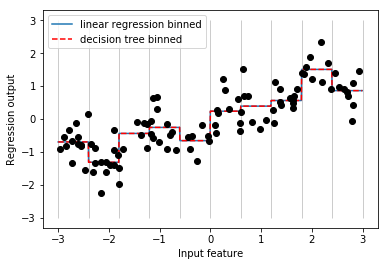

In [80]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), 'r--', label='decision tree binned')

plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=0.2)
plt.legend()
plt.xlabel('Input feature')
plt.ylabel('Regression output')

In [81]:
line_binned

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [82]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(100, 11)


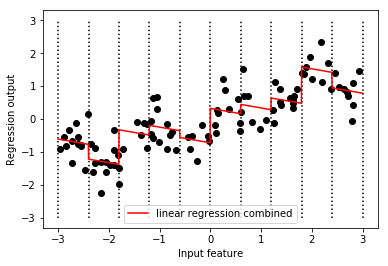

In [92]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), 'r',label='linear regression combined', zorder=3)

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
    
plt.legend()
plt.xlabel('Input feature')
plt.ylabel('Regression output')
plt.plot(X[:, 0], y, 'o', c='k')

In [102]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(100, 20)


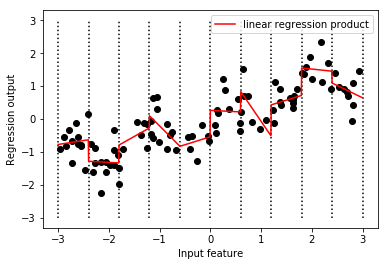

In [107]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), 'r',
         label='linear regression product', zorder=10)

for bin_ in bins:
    plt.plot([bin_, bin_], [-3, 3], 'k:')

plt.plot(X[:, 0], y, 'ko')
plt.xlabel('Input feature')
plt.ylabel('Regression output')
plt.legend()

In [139]:
from sklearn.preprocessing import PolynomialFeatures

# include polynomials up to x ** 10
# the default 'include_bias=True' adds a feature that's constantly 1
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [140]:
print('X_poly.shape: {}'.format(X_poly.shape))

X_poly.shape: (100, 10)


In [141]:
print('Entries of X:\n{}'.format(X[:5]))
print('Entries of X_poly:\n{}'.format(X_poly[:5]))

Entries of X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Entries of X_poly:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [138]:
print('Polynominal feature names:\n{}'.format(poly.get_feature_names()))

Polynominal feature names:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5']


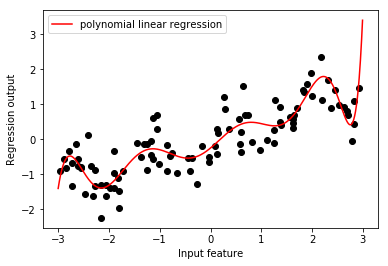

In [142]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(X[:, 0], y, 'ko')
plt.plot(line, reg.predict(line_poly), 'r', label='polynomial linear regression')
plt.xlabel('Input feature')
plt.ylabel('Regression output')
plt.legend()

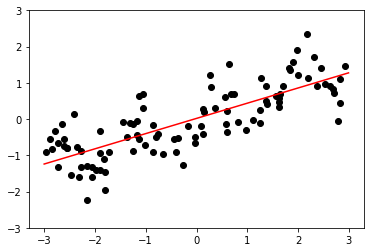

In [137]:
fig, ax = plt.subplots()

def update(f):
    poly = PolynomialFeatures(degree=f+1, include_bias=False).fit(X)
    X_poly = poly.transform(X)
    line_poly = poly.transform(line)
    
    reg = LinearRegression().fit(X_poly, y)
    
    ax.cla()
    ax.set_ylim(-3, 3)
    ax.plot(X[:, 0], y, 'ko')
    ax.plot(line, reg.predict(line_poly), 'r', label='polynomial linear regression')
    
anim = FuncAnimation(fig, update, 20, interval=1000)
HTML(anim.to_html5_video())

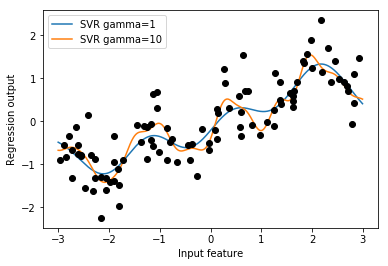

In [144]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))
    
plt.plot(X[:, 0], y, 'ko')
plt.xlabel('Input feature')
plt.ylabel('Regression output')
plt.legend()

In [146]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, random_state=0)

# rescale data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [147]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print('X_train.shape: {}'.format(X_train.shape))
print('X_train_poly.shape: {}'.format(X_train_poly.shape))

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


In [156]:
print('Polynomial feature names:\n{}'.format(poly.get_feature_names()))

Polynomial feature names:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [160]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train_scaled, y_train)
print('Score without interactions: {:.2f}'.format(
    ridge.score(X_test_scaled, y_test)))

ridge = Ridge().fit(X_train_poly, y_train)
print('Score with interactions: {:.2f}'.format(
    ridge.score(X_test_poly, y_test)))

Score without interactions: 0.62
Score with interactions: 0.75


In [164]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print('Score without interactions: {:.2f}'.format(
    rf.score(X_test_scaled, y_test)))

rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print('Score with interactions: {:.2f}'.format(
    rf.score(X_test_poly, y_test)))

Score without interactions: 0.78
Score with interactions: 0.77


In [167]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

In [172]:
print('Number of feature appearances:\n{}'.format(np.bincount(X[:, 0])))

Number of feature appearances:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0,0.5,'Number of appearances')

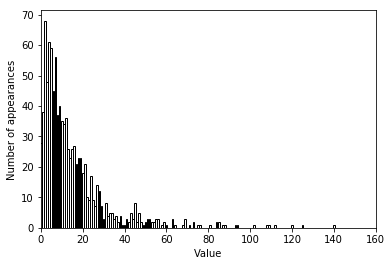

In [187]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='w', edgecolor='k')
plt.xlim([0, 160])
plt.xlabel('Value')
plt.ylabel('Number of appearances')

In [188]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print('Test score: {:.3f}'.format(score))

Test score: 0.622


In [189]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

Text(0,0.5,'Number of appearances')

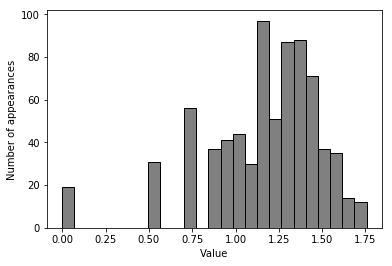

In [192]:
plt.hist(np.log(X_train_log[:, 0] + 1), 25, color='gray', edgecolor='k')
plt.xlabel('Value')
plt.ylabel('Number of appearances')

In [193]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print('Test score: {:.3f}'.format(score))

Test score: 0.875


In [196]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile

cancer = load_breast_cancer()

# get deterministic random numbers
rnd = np.random.RandomState(42)
noise = rnd.normal(size=(len(cancer.data), 50))

# add noise features to the data
# the first 30 features are from the dataset, the next 50 are noise
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=0.5)

# use f_classif (the default) and SelectionPercentile to select 50% of features
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)

# transform training set
X_train_selected = select.transform(X_train)

print('X_train.shape: {}'.format(X_train.shape))
print('X_train_selected.shape: {}'.format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


Text(0.5,0,'Sample index')

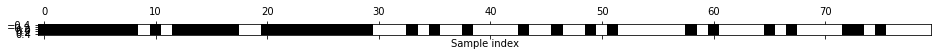

In [197]:
mask = select.get_support()
print(mask)

# visualize the mask -- black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel('Sample index')

In [201]:
from sklearn.linear_model import LogisticRegression

# transform test data
X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print('Score with all features: {:.3f}'.format(
    lr.score(X_test, y_test)))

lr.fit(X_train_selected, y_train)
print('Score with only selected features: {:.3f}'.format(
    lr.score(X_test_selected, y_test)))

Score with all features: 0.930
Score with only selected features: 0.940


In [212]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold='median')

In [213]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print('X_train.shape: {}'.format(X_train.shape))
print('X_train_l1.shape: {}'.format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


Text(0.5,0,'Sample index')

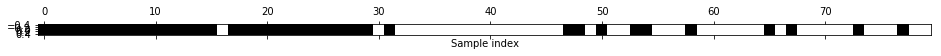

In [220]:
mask = select.get_support()

# visualize the mask -- black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel('Sample index')

In [215]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print('Test score: {:.3f}'.format(score))

Test score: 0.951


Text(0.5,0,'Sample index')

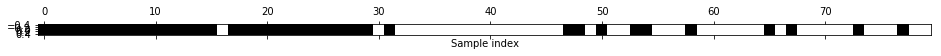

In [216]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
            n_features_to_select=40)

select.fit(X_train, y_train)

# visualize the selected features:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel('Sample index')

In [221]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)
score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print('Test score: {:.3f}'.format(score))

Test score: 0.951


In [222]:
citibike = mglearn.datasets.load_citibike()

print('Citi Bike data:\n{}'.format(citibike.head()))

Citi Bike data:
starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


Text(0,0.5,'Rentals')

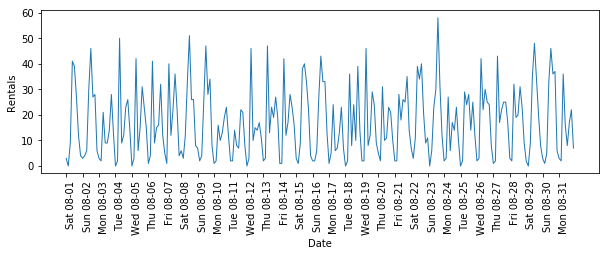

In [223]:
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(),
                      freq='D')
plt.xticks(xticks, xticks.strftime('%a %m-%d'), rotation=90, ha='left')
plt.plot(citibike, linewidth=1)
plt.xlabel('Date')
plt.ylabel('Rentals')

In [241]:
# extract the target values (number of rentals)
y = citibike.values
# convert the time to POSIX time using '%s'
X = pd.to_numeric(citibike.index).values.reshape(-1, 1)

In [242]:
# use the first 184 data points for training, and the rest for testing
n_train = 184

# function to evalutate and plot a regressor on a given feature set
def eval_on_features(features, target, regressor):
    # split the given features into a training and a test set
    X_train, X_test = features[:n_train], features[n_train:]
    # also split the target array
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print('Test-set R^2: {:.2f}'.format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))
    
    plt.xticks(range(0, len(X), 8), xticks.strftime('%a %m-%d'), rotation=90,
              ha='left')
    
    plt.plot(range(n_train), y_train, label='train')
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label='test')
    plt.plot(range(n_train), y_pred_train, '--', label='prediction train')
    
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--',
            label='prediction test')
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Rentals')

Test-set R^2: -0.04


<Figure size 432x288 with 0 Axes>

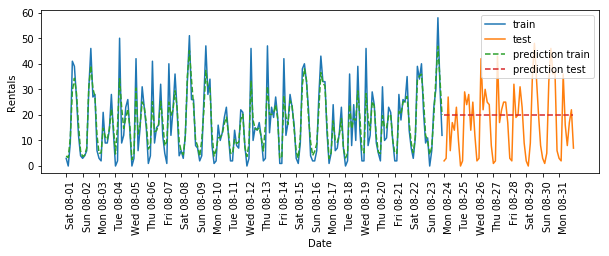

In [243]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
plt.figure()
eval_on_features(X, y, regressor)

In [251]:
print(X[:10])
print(X_hour[:10])

[[1438387200000000000]
 [1438398000000000000]
 [1438408800000000000]
 [1438419600000000000]
 [1438430400000000000]
 [1438441200000000000]
 [1438452000000000000]
 [1438462800000000000]
 [1438473600000000000]
 [1438484400000000000]]
[[ 0]
 [ 3]
 [ 6]
 [ 9]
 [12]
 [15]
 [18]
 [21]
 [ 0]
 [ 3]]


Test-set R^2: 0.60


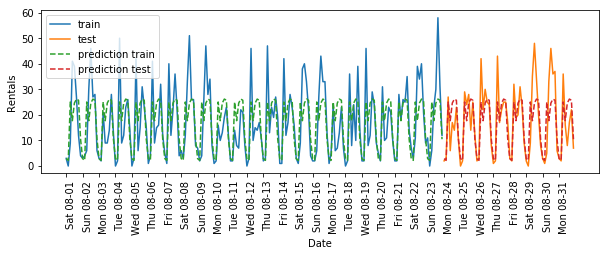

In [252]:
X_hour = citibike.index.hour.values.reshape(-1, 1)
eval_on_features(X_hour, y, regressor)

Test-set R^2: 0.84


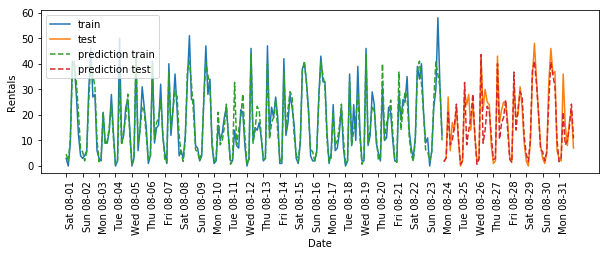

In [254]:
X_hour_week = np.hstack([
    citibike.index.dayofweek.values.reshape(-1, 1),
                        citibike.index.hour.values.reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

Test-set R^2: 0.13


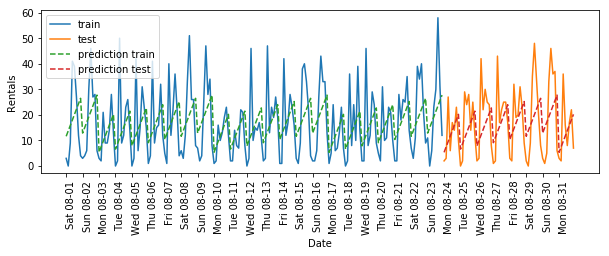

In [255]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

Test-set R^2: 0.62


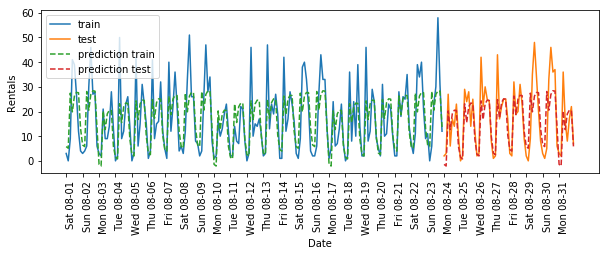

In [257]:
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

eval_on_features(X_hour_week_onehot, y, Ridge())

Test-set R^2: 0.85


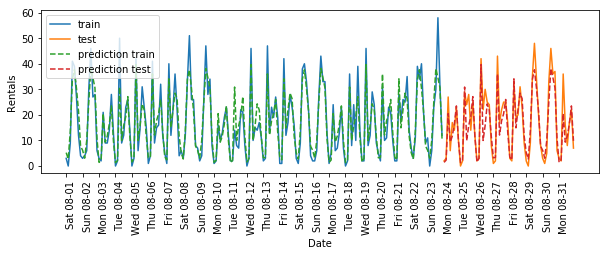

In [258]:
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True,
                                     include_bias=False)

X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

In [261]:
hour = ['%02d:00' % i for i in range(0, 24, 3)]
day = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
features = day + hour

In [265]:
features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

Text(0,0.5,'Feature magnitude')

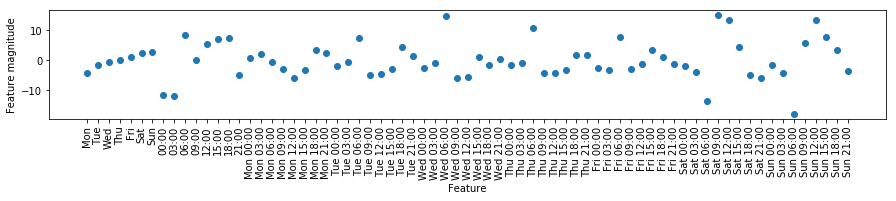

In [267]:
plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature magnitude')

In [282]:
print(np.digitize([1,2,3,4,5,6], [0,3,6]))
print(np.digitize([1,2,3,4,5,6], [0,3,6], True))

r = (np.random.rand(20)*10).astype(int)
print(r)
print(np.digitize(r, [0,2,4,6,8]))
#print(np.digitize(r, [0,4,2,6,8]))

[1 1 2 2 2 3]
[1 1 1 2 2 2]
[4 3 7 6 7 5 0 1 6 8 0 8 2 8 4 5 5 2 5 0]
[3 2 4 4 4 3 1 1 4 5 1 5 2 5 3 3 3 2 3 1]


ValueError: bins must be monotonically increasing or decreasing

In [330]:
import re

rule = {
    'G' : 'YR',
    'Y' : 'RS',
    'S' : 'BP',
    'R' : 'SB',
    'B' : 'GP'
}

rep = {re.escape(k):v for k, v in rule.items()}
pattern = re.compile('|'.join(rep.keys()))
state = 'G'

for i in range(0, 10):
    print(state)
    state = pattern.sub(lambda m: rep[re.escape(m.group(0))], state)

G
YR
RSSB
SBBPBPGP
BPGPGPPGPPYRP
GPPYRPYRPPYRPPRSSBP
YRPPRSSBPRSSBPPRSSBPPSBBPBPGPP
RSSBPPSBBPBPGPPSBBPBPGPPPSBBPBPGPPPBPGPGPPGPPYRPP
SBBPBPGPPPBPGPGPPGPPYRPPBPGPGPPGPPYRPPPBPGPGPPGPPYRPPPGPPYRPYRPPYRPPRSSBPP
BPGPGPPGPPYRPPPGPPYRPYRPPYRPPRSSBPPGPPYRPYRPPYRPPRSSBPPPGPPYRPYRPPYRPPRSSBPPPYRPPRSSBPRSSBPPRSSBPPSBBPBPGPPP


In [374]:
a = np.array(['a', 'b', 'c', 'b', 'c'],dtype=str)
a2 = np.array([1, 2, 3, 2, 3],dtype=str)
b = a.reshape(-1, 1)
c = pd.get_dummies(pd.DataFrame(a2, columns=['V']))
print(a)
print(c)

['a' 'b' 'c' 'b' 'c']
   V_1  V_2  V_3
0    1    0    0
1    0    1    0
2    0    0    1
3    0    1    0
4    0    0    1
